# Predict Housing Prices with regularized regression

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [5]:
data=pd.read_csv('house.csv')
data.head()

,Area,Total Rooms,Bedrooms,Bathroom,Amount(in rupees)
0,2104,3,1,2,399900
1,1600,3,2,2,329900
2,2400,3,2,2,369000
3,1416,2,1,1,232000
4,3000,4,2,2,539900


In [6]:
data.isna().sum()

Area                 0
Total Rooms          0
Bedrooms             0
Bathroom             0
Amount(in rupees)    0
dtype: int64

In [7]:
x=data.iloc[:,:4]
x.head()

,Area,Total Rooms,Bedrooms,Bathroom
0,2104,3,1,2
1,1600,3,2,2
2,2400,3,2,2
3,1416,2,1,1
4,3000,4,2,2


In [8]:
y=data.iloc[:,-1:]
y.head()

,Amount(in rupees)
0,399900
1,329900
2,369000
3,232000
4,539900


In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)
print(len(xtest),len(ytest))

12 12


In [10]:
xtrain.shape

(35, 4)

In [12]:
ytrain.shape

(35, 1)

In [13]:
base_reg=LinearRegression()
base_reg.fit(xtrain,ytrain)
base_pred=base_reg.predict(xtest)


In [14]:
from sklearn.metrics import r2_score
print('R-Square:\t',r2_score(ytest,base_pred))
print()
print('Base Train Score:\t',base_reg.score(xtrain,ytrain))
print()
print('Base Train Score:\t',base_reg.score(xtest,ytest))

R-Square:	 0.6487644480662038

Base Train Score:	 0.7667224811749975

Base Train Score:	 0.6487644480662038


In [15]:
print("Lasso Regression Model")
print()
lr=Lasso(alpha=0.01)
lr.fit(xtrain,ytrain)
lr_pred=lr.predict(xtest)
print("Lasso Train_score:\t", lr.score(xtrain,ytrain))
print()
print("Lasso Test_score:\t", lr.score(xtest,ytest))
print()
print("Lasso R-Square:\t",r2_score(ytest,lr_pred))

Lasso Regression Model

Lasso Train_score:	 0.7667224811741168

Lasso Test_score:	 0.648764567455816

Lasso R-Square:	 0.648764567455816


In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Mean Squared Error: \t', mean_squared_error(ytest,lr_pred))
print()
print('RMSE: \t', np. sqrt (mean_squared_error(ytest,lr_pred)))
print()
print('Mean Absolute Error: \t', mean_absolute_error(ytest,lr_pred))

Mean Squared Error: 	 6820596282.581581

RMSE: 	 82586.90139835482

Mean Absolute Error: 	 61774.50143859239


In [19]:
print("Ridge Regression Model")
print()
rr=Lasso(alpha=0.01)
rr.fit(xtrain,ytrain)
rr_pred=rr.predict(xtest)
print("Ridge Train_score:\t", rr.score(xtrain,ytrain))
print()
print("Ridge Test_score:\t", rr.score(xtest,ytest))
print()
print("Ridge R-Square:\t",r2_score(ytest,rr_pred))

Ridge Regression Model

Ridge Train_score:	 0.7667224811741168

Ridge Test_score:	 0.648764567455816

Ridge R-Square:	 0.648764567455816


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('Mean Squared Error: \t', mean_squared_error(ytest,rr_pred))
print()
print('RMSE: \t', np. sqrt (mean_squared_error(ytest,rr_pred)))
print()
print('Mean Absolute Error: \t', mean_absolute_error(ytest,rr_pred))

Mean Squared Error: 	 6820596282.581581

RMSE: 	 82586.90139835482

Mean Absolute Error: 	 61774.50143859239


# 2) Heteroscedasticity and Multicollinearty

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv('Employee Data.csv')
df.head()

,Employment_ID,Age,Gender,EducationField,Department,JobRole,No. of Projects,Experience,PerformanceRating
0,8949,41,Female,Life Sciences,Sales,Sales Executive,4,20,3
1,29725,49,Male,Life Sciences,Research & Development,Research Scientist,3,15,4
2,11561,37,Male,Other,Research & Development,Laboratory Technician,4,5,3
3,33241,33,Female,Life Sciences,Research & Development,Research Scientist,2,1,3
4,666,27,Male,Medical,Research & Development,Laboratory Technician,3,20,3


In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [55]:
df['Gender']=le.fit_transform(df['Gender'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Department']=le.fit_transform(df['Department'])
df['JobRole']=le.fit_transform(df['JobRole'])
df.head()

,Employment_ID,Age,Gender,EducationField,Department,JobRole,No. of Projects,Experience,PerformanceRating
0,8949,41,0,0,2,7,4,20,3
1,29725,49,1,0,1,6,3,15,4
2,11561,37,1,3,1,2,4,5,3
3,33241,33,0,0,1,6,2,1,3
4,666,27,1,2,1,2,3,20,3


In [56]:
a=df.iloc[:,:8]
a.head(5)

,Employment_ID,Age,Gender,EducationField,Department,JobRole,No. of Projects,Experience
0,8949,41,0,0,2,7,4,20
1,29725,49,1,0,1,6,3,15
2,11561,37,1,3,1,2,4,5
3,33241,33,0,0,1,6,2,1
4,666,27,1,2,1,2,3,20


In [57]:
b=df.iloc[:,-1:]
b.head()

,PerformanceRating
0,3
1,4
2,3
3,3
4,3


In [58]:
import sklearn
from sklearn.model_selection import train_test_split

atrain,atest,btrain,btest=train_test_split(a,b,test_size=0.25,random_state=2)

In [59]:
atrain

,Employment_ID,Age,Gender,EducationField,Department,JobRole,No. of Projects,Experience
5,21651,32,1,0,1,2,3,11
25,14505,53,0,3,1,3,2,4
77,22134,45,1,3,1,5,2,3
74,29117,36,0,0,1,2,4,1
62,24690,50,0,2,1,5,2,13
...,...,...,...,...,...,...,...,...
43,13643,27,1,0,2,7,3,9
22,6491,34,0,0,1,5,5,10
72,12731,31,1,2,1,6,5,2
15,6588,29,0,0,1,4,2,16


In [60]:
atest

,Employment_ID,Age,Gender,EducationField,Department,JobRole,No. of Projects,Experience
83,25413,38,0,2,1,6,2,5
30,14928,33,1,2,1,2,3,20
56,25296,35,1,0,2,7,1,2
24,22767,34,1,2,1,6,3,5
16,4167,32,1,0,1,6,3,1
23,7041,21,1,0,1,6,2,1
2,11561,37,1,3,1,2,4,5
27,28476,42,1,1,2,7,4,5
28,21538,44,0,2,1,0,4,11
13,5826,34,1,2,1,2,3,2


In [61]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('Training Started...\n')
print()
lin_reg.fit(atrain,btrain)
print()
print('Training Completed.....\n')
print()
print('Testing invoked....\n')
bpred=lin_reg.predict(atest)
print('Predict Total Employee Performance\n',bpred)
print('\n Testing is also Completed...\n')

Training Started...



Training Completed.....


Testing invoked....

Predict Total Employee Performance
 [[3.2952111 ]
 [3.00856197]
 [3.54566978]
 [3.27087927]
 [3.4177779 ]
 [3.47300711]
 [3.0518087 ]
 [3.313305  ]
 [3.05084703]
 [3.19232477]
 [3.11106176]
 [3.26701184]
 [3.2930536 ]
 [3.29890464]
 [3.11443001]
 [3.34287055]
 [3.54640053]
 [3.04907692]
 [3.40843082]
 [3.35055696]
 [3.11194867]
 [3.37304434]
 [3.15244715]
 [3.0421915 ]
 [3.47580517]]

 Testing is also Completed...



In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(btest,bpred))
print()
print('RMSE: \t', np. sqrt (mean_squared_error(btest,bpred)))
print()
print('Variance Score:\t', explained_variance_score(btest,bpred))
print()
print('R-Square: \t', r2_score(btest,bpred))

Mean Squared Error: 	 0.15271004785289835

RMSE: 	 0.3907813299697138

Variance Score:	 -0.05842187728077297

R-Square: 	 -0.13623547509596978


In [13]:
diff =btest-bpred
diff

,PerformanceRating
83,-0.295211
30,-0.008562
56,0.454330
24,-0.270879
16,-0.417778
23,-0.473007
2,-0.051809
27,-0.313305
28,-0.050847
13,-0.192325


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(a):
    vif = pd.DataFrame()
    vif["variables"]=a.columns
    vif["VIF"] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
    return(vif)

In [64]:
dr=calc_vif(a)

In [65]:
dr

,variables,VIF
0,Employment_ID,4.031108
1,Age,11.886465
2,Gender,2.630671
3,EducationField,1.952524
4,Department,14.825839
5,JobRole,7.632316
6,No. of Projects,5.361464
7,Experience,2.988046


In [66]:
X=df.drop(['Age'],axis=1)
calc_vif(X)

,variables,VIF
0,Employment_ID,4.046648
1,Gender,2.874925
2,EducationField,1.896893
3,Department,14.182368
4,JobRole,7.601035
5,No. of Projects,6.083977
6,Experience,2.812886
7,PerformanceRating,17.076426


In [68]:
residuals=btest-bpred
residuals

,PerformanceRating
83,-0.295211
30,-0.008562
56,0.454330
24,-0.270879
16,-0.417778
23,-0.473007
2,-0.051809
27,-0.313305
28,-0.050847
13,-0.192325


array([[<Axes: title={'center': 'PerformanceRating'}>]], dtype=object)

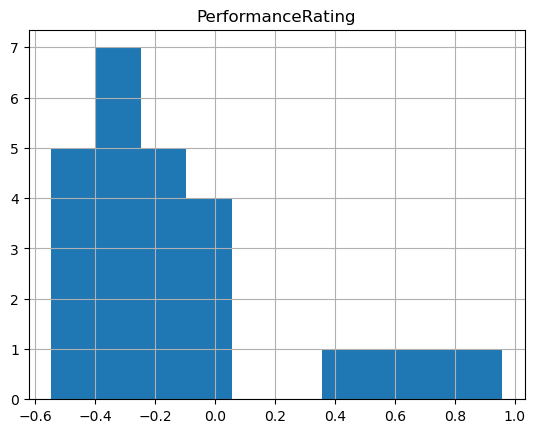

In [69]:
residuals.hist()

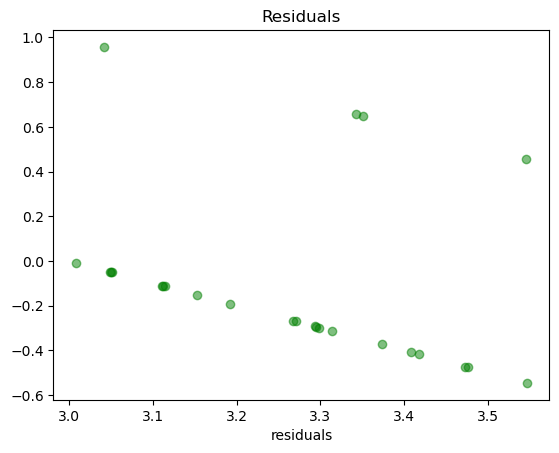

In [70]:
plt.scatter(bpred,residuals,color="green",alpha=0.5)
plt.title("Residuals")
plt.xlabel("ypred")
plt.xlabel("residuals")
plt.show()

Text(0, 0.5, 'Residuals')

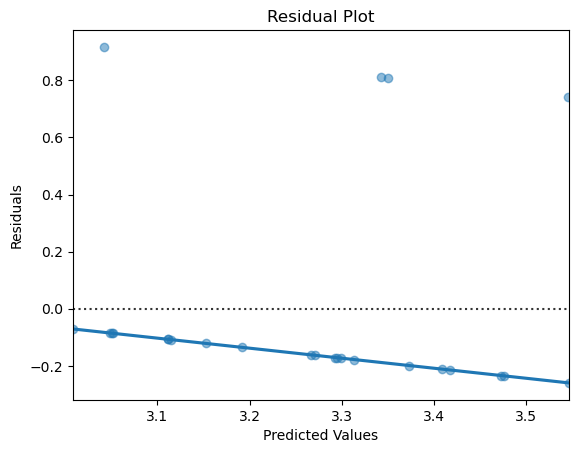

In [71]:
sns.residplot(x=bpred, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

In [72]:
import statsmodels.api as sm

from statsmodels.stats.diagnostic import het_breuschpagan
exog_with_const = sm.add_constant(bpred)
lm, p_lm, f_lm, fp_lm = het_breuschpagan(residuals,exog_with_const)

# Print the results
print("Breusch-Pagan Test:")
print(f"LM Statistic: {lm}")
print(f"P-value: {p_lm}")

Breusch-Pagan Test:
LM Statistic: 1.2273208484800624
P-value: 0.2679287026338055
